In [29]:
# Importing important libraries
import numpy as np
import pandas as pd


In [30]:
# Loading the data
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')
df

C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_21952\526449117.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',sep = ';',
C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_21952\526449117.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',sep = ';',
C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_21952\526449117.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',sep = ';',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


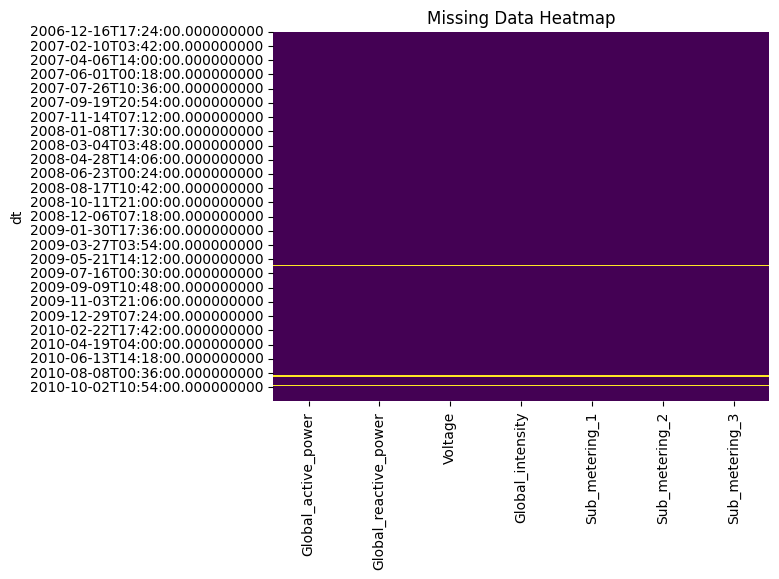

In [32]:
# Graphical representation of Missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [33]:
# Checking any null data
df.isnull().sum().any()

True

In [34]:
# printing the % of null data column wise
percentage_of_null_data = (df.isnull().sum() / len(df)) * 100
print(percentage_of_null_data)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [35]:
print(df[df.isnull().any(axis=1)])


                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-21 11:23:00                  NaN                    NaN      NaN   
2006-12-21 11:24:00                  NaN                    NaN      NaN   
2006-12-30 10:08:00                  NaN                    NaN      NaN   
2006-12-30 10:09:00                  NaN                    NaN      NaN   
2007-01-14 18:36:00                  NaN                    NaN      NaN   
...                                  ...                    ...      ...   
2010-09-28 19:09:00                  NaN                    NaN      NaN   
2010-09-28 19:10:00                  NaN                    NaN      NaN   
2010-09-28 19:11:00                  NaN                    NaN      NaN   
2010-09-28 19:12:00                  NaN                    NaN      NaN   
2010-10-24 15:35:00                  NaN                    NaN      NaN   

           

In [36]:
final_df = df.dropna()

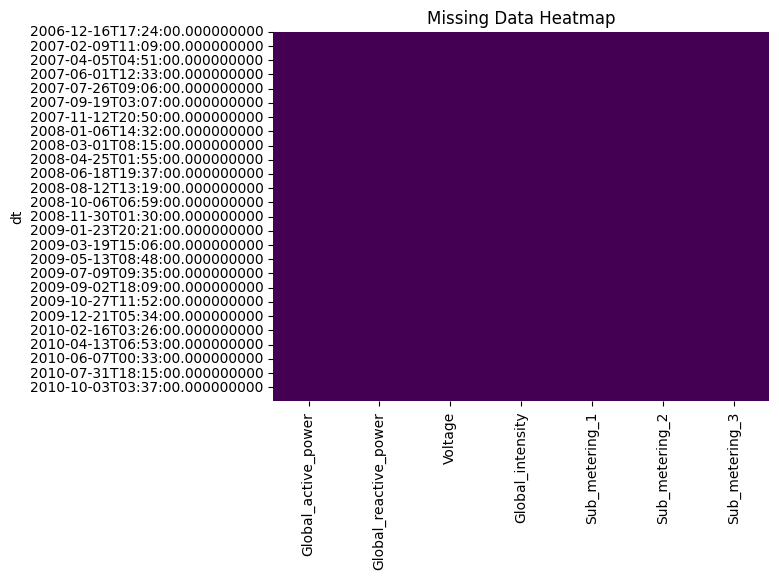

In [37]:
# Graphical representation of  after handling Missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(final_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [38]:
# Checking any null values
final_df.isnull().sum().any()

False

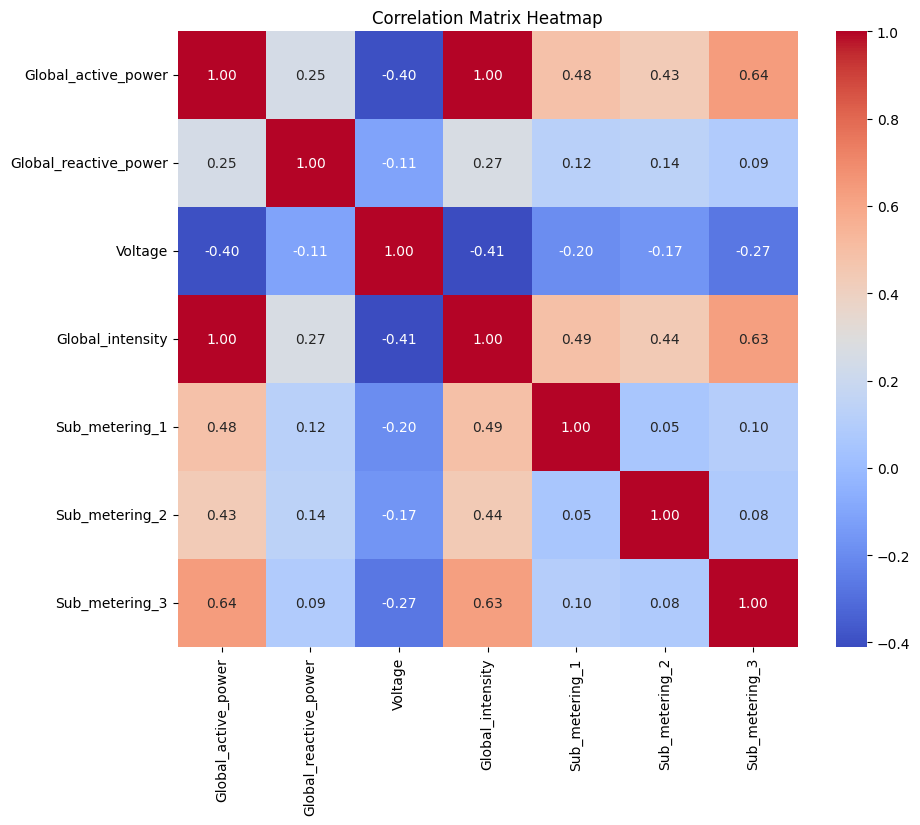

In [39]:
# Correlation metrics
correlation_matrix = final_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

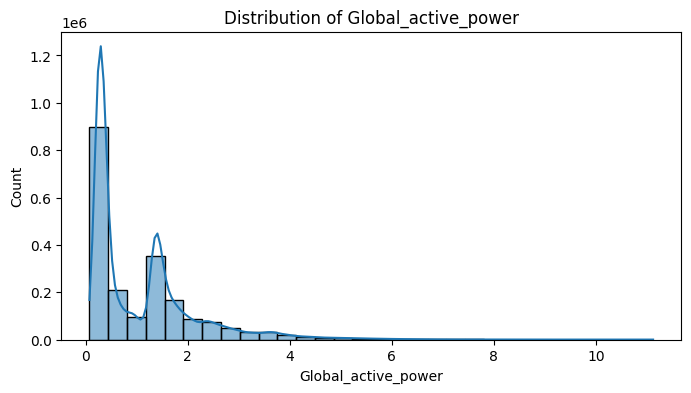

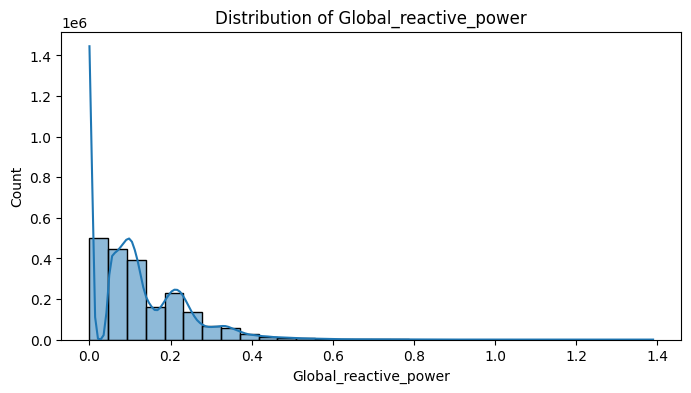

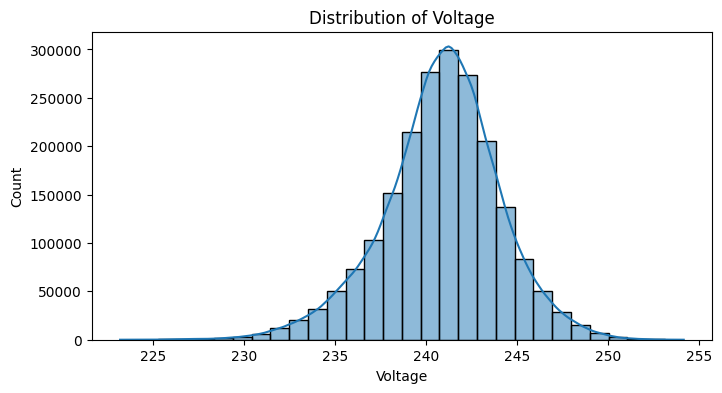

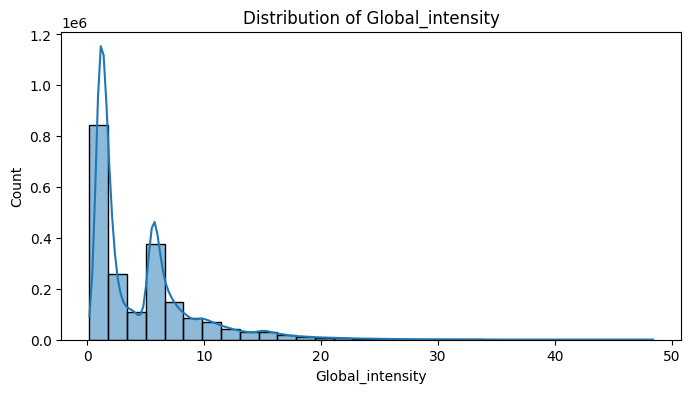

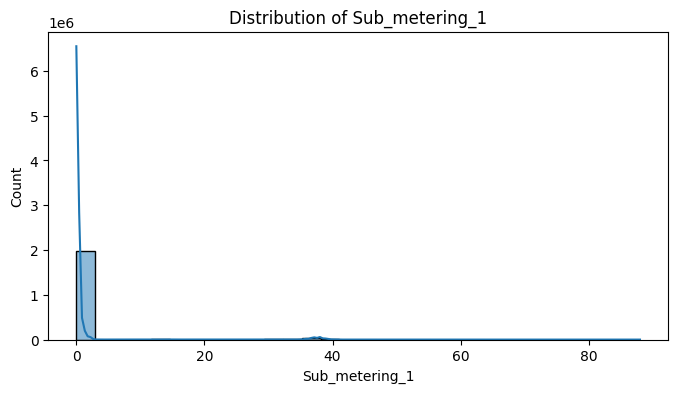

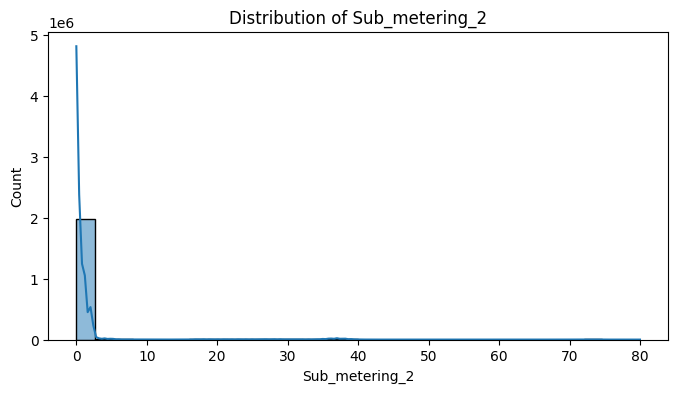

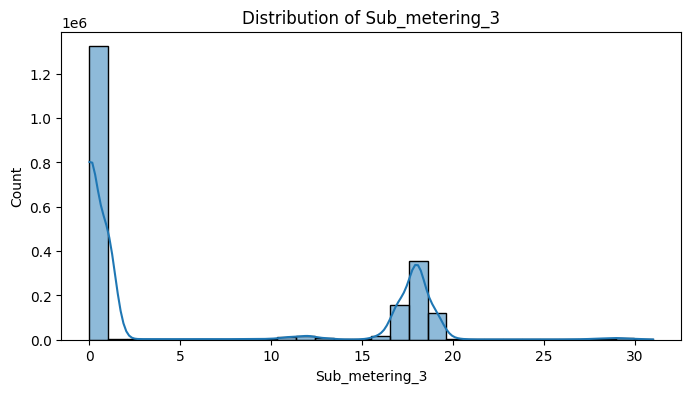

In [40]:
for data in final_df:
    plt.figure(figsize=(8, 4))
    sns.histplot(final_df[data], kde=True, bins=30)
    plt.title(f"Distribution of {data}")
    plt.show()

In [41]:
final_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [43]:
X = final_df[['Global_reactive_power','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']]

y = final_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [44]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_LR = LR.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display model coefficients
print("Coefficients:", LR.coef_)
print("Intercept:", LR.intercept_)

Mean Squared Error: 0.0018553035622650106
R-squared: 0.9983402068941102
Coefficients: [-0.17655432  0.2367197  -0.00030792 -0.00040574  0.00215229]
Intercept: 0.004984532125025254


In [47]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import neighbors

In [48]:
_Lasso = Lasso()
_Lasso.fit(X_train, y_train)
y_pred_Lasso = _Lasso.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred_Lasso)
r2 = r2_score(y_test, y_pred_Lasso)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display model coefficients
print("Coefficients:", _Lasso.coef_)
print("Intercept:", _Lasso.intercept_)

Mean Squared Error: 0.05356147969470803
R-squared: 0.9520827876652158
Coefficients: [0.         0.17868378 0.         0.         0.00700284]
Intercept: 0.21956921758050196


In [50]:
_Ridge = Ridge()
_Ridge.fit(X_train, y_train)
y_pred_Ridge = _Ridge.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred_Ridge)
r2 = r2_score(y_test, y_pred_Ridge)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display model coefficients
print("Coefficients:", _Ridge.coef_)
print("Intercept:", _Ridge.intercept_)

Mean Squared Error: 0.001855302984468924
R-squared: 0.9983402074110186
Coefficients: [-0.17654495  0.23671958 -0.00030791 -0.00040572  0.00215231]
Intercept: 0.004983724366291353


In [52]:
KNN = neighbors.KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred_KNN)
r2 = r2_score(y_test, y_pred_KNN)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0014980830387257965
R-squared: 0.998659783794792


In [54]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred_GBR = GBR.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred_GBR)
r2 = r2_score(y_test, y_pred_GBR)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display model coefficients
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

Mean Squared Error: 0.0013854078021418503
R-squared: 0.998760585401974


In [59]:

print("LinearRegression:\n")
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)
mae = mean_absolute_error(y_test, y_pred_LR)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


print("-\n---------------------------------------------")
print("\n")

print("Lasso:\n")
mse = mean_squared_error(y_test, y_pred_Lasso)
r2 = r2_score(y_test, y_pred_Lasso)
mae = mean_absolute_error(y_test, y_pred_KNN)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


print("-\n---------------------------------------------")
print("\n")
print("Ridge:\n")
mse = mean_squared_error(y_test, y_pred_Ridge)
r2 = r2_score(y_test, y_pred_Ridge)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



print("\n----------------------------------------------")

print("\n")
print("KNeighborsRegressor\n")
mse = mean_squared_error(y_test, y_pred_KNN)
r2 = r2_score(y_test, y_pred_KNN)
mae = mean_absolute_error(y_test, y_pred_KNN)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

print("\n----------------------------------------------")

print("\n")
print("GradientBoostingRegressor\n")
mse = mean_squared_error(y_test, y_pred_GBR)
r2 = r2_score(y_test, y_pred_GBR)
mae = mean_absolute_error(y_test, y_pred_GBR)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


LinearRegression:

Mean Squared Error: 0.0018553035622650106
R-squared: 0.9983402068941102
Mean Absolute Error (MAE): 0.02756300110183493
-
---------------------------------------------


Lasso:

Mean Squared Error: 0.05356147969470803
R-squared: 0.9520827876652158
Mean Absolute Error (MAE): 0.023023633666458466
-
---------------------------------------------


Ridge:

Mean Squared Error: 0.001855302984468924
R-squared: 0.9983402074110186
Mean Absolute Error (MAE): 0.023023633666458466

----------------------------------------------


KNeighborsRegressor

Mean Squared Error: 0.0014980830387257965
R-squared: 0.998659783794792
Mean Absolute Error (MAE): 0.023023633666458466

----------------------------------------------


GradientBoostingRegressor

Mean Squared Error: 0.0013854078021418503
R-squared: 0.998760585401974
Mean Absolute Error (MAE): 0.023864459086471477


In [ ]:
'''
Conclusions:

based on R2 and MSE

Gradient is best in error minimozation because compared to other model gradient has low MSE
KNN is 2nd best model after Gradient 
Both Linear and Ridge is 3rd best
Lasso is the 4th

Based on MAE

Best - KNN, Ridge, Laso
2nd Best - Gradient
3rd - Linear



'''